# Introduction

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import graphviz

# install graphviz on Windows using `winget install graphviz`
# install graphviz on Ubuntu using `sudo apt install graphviz`
# install graphviz on Mac using `brew install graphviz`
# make sure the to set up your PATH to point at the newly installed binaries

# Decision Tree Classifier

In [192]:
x = [[np.random.randn(), np.random.randn()] for i in range(1, 300)]
y = [[(a > 0) & (b > 0) | (a < 0) & (b < 0)] for (a, b) in x]

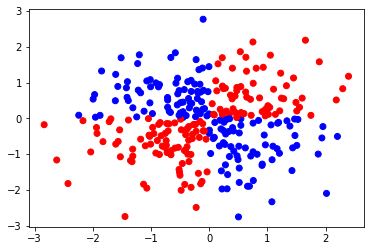

In [193]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=y, cmap='bwr')

In [214]:
from sklearn.metrics import accuracy_score, classification_report

mc = tree.DecisionTreeClassifier(max_depth=1, min_samples_leaf=5) 
mc.fit(x, y)

accuracy_score(y, mc.predict(x))

0.5585284280936454

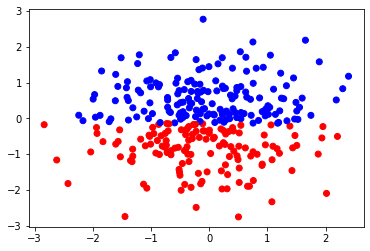

In [215]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=mc.predict(x), cmap='bwr')

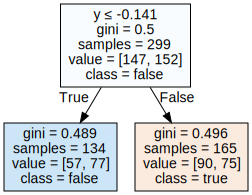

In [220]:
features = ["x", "y"]
target = ["true", "false"]

dat = tree.export_graphviz(mc, filled=True, special_characters=True, feature_names=features, class_names=target)

graph = graphviz.Source(dat)
graph

In [217]:
m2c = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=5) 
m2c.fit(x, y)

ŷ = m2c.predict(x)

accuracy_score(y, ŷ)

0.9264214046822743

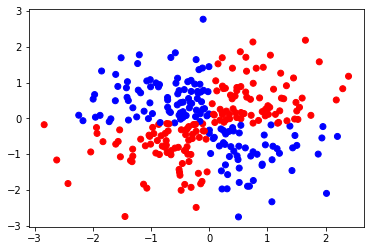

In [218]:
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=ŷ, cmap='bwr')

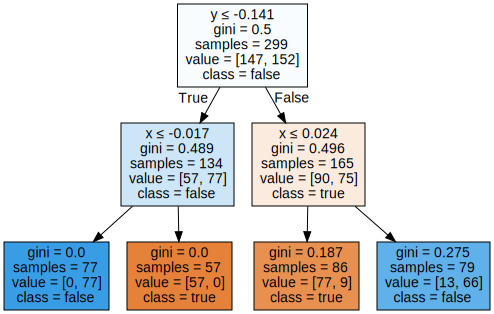

In [219]:
features = ["x", "y"]
target = ["true", "false"]

dat = tree.export_graphviz(m2c, filled=True, special_characters=True, feature_names=features, class_names=target)

graph = graphviz.Source(dat)
graph

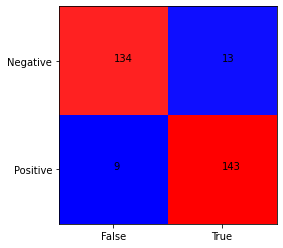

In [210]:
# we can visualize the accuracy of the model using a confusion matrix

acc = confusion_matrix(y, ŷ)

plt.close('all')

fig, ax = plt.subplots()
ax.imshow(acc, cmap='bwr')
ax.xaxis.set(ticks=(0, 1), ticklabels=('False', 'True'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Negative', 'Positive'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, acc[i][j], color='black')
plt.show()

TODO - Let us walk through a bit of important theoretical premises which are often misunderstood (even by highly experienced machine learning practitioners).

# Decision Tree Regressor

In [43]:
x = np.linspace(0, 4 * 3.14159, 1000)
y = np.sin(x) + np.random.randn(1000)/5

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

Text(0, 0.5, 'target')

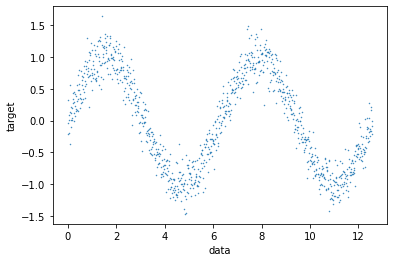

In [44]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(x, y, s=0.2)
ax.set_xlabel("data")
ax.set_ylabel("target")

In [47]:
from sklearn import tree
from sklearn.metrics import mean_squared_error

m2 = tree.DecisionTreeRegressor(max_depth=2, min_samples_leaf=5) 
m2.fit(x, y)

mean_squared_error(y, m2.predict(x))

0.3105487942827386

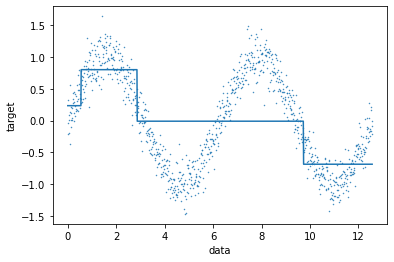

In [48]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(x, y, s=0.2)
ax.set_xlabel("data")
ax.set_ylabel("target")
plt.plot(x, m2.predict(x))

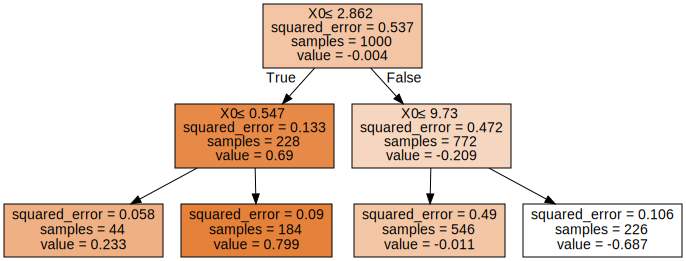

In [52]:
dat = tree.export_graphviz(m2, filled=True, special_characters=True)
graph = graphviz.Source(dat)
graph

In [303]:
m5 = tree.DecisionTreeRegressor(max_depth=5, min_samples_leaf=5) 
m5.fit(x, y)

mean_squared_error(y, m5.predict(x))

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.          0.02515788  0.05031576  0.07547364  0.10063151  0.12578939
  0.15094727  0.17610514  0.20126303  0.2264209   0.25157878  0.27673665
  0.30189455  0.3270524   0.35221028  0.37736818  0.40252605  0.42768392
  0.4528418   0.4779997   0.50315756  0.5283154   0.5534733   0.57863116
  0.6037891   0.62894696  0.6541048   0.6792627   0.70442057  0.72957844
  0.75473636  0.77989423  0.8050521   0.83021     0.85536784  0.8805257
  0.9056836   0.9308415   0.9559994   0.98115724  1.0063151   1.031473
  1.0566308   1.0817888   1.1069466   1.1321045   1.1572623   1.1824203
  1.2075782   1.232736    1.2578939   1.2830517   1.3082097   1.3333676
  1.3585254   1.3836833   1.4088411   1.4339991   1.4591569   1.4843148
  1.5094727   1.5346305   1.5597885   1.5849463   1.6101042   1.635262
  1.66042     1.6855779   1.7107357   1.7358936   1.7610514   1.7862093
  1.8113672   1.8365251   1.861683    1.8868408   1.9119987   1.9371566
  1.9623145   1.9874723   2.0126302   2.0377882   2.062946    2.0881038
  2.1132617   2.1384196   2.1635776   2.1887355   2.2138932   2.239051
  2.264209    2.289367    2.3145247   2.3396826   2.3648405   2.3899984
  2.4151564   2.440314    2.465472    2.49063     2.5157878   2.5409458
  2.5661035   2.5912614   2.6164193   2.6415772   2.6667352   2.6918929
  2.7170508   2.7422087   2.7673666   2.7925243   2.8176823   2.8428402
  2.8679981   2.893156    2.9183137   2.9434717   2.9686296   2.9937875
  3.0189455   3.0441031   3.069261    3.094419    3.119577    3.1447346
  3.1698925   3.1950505   3.2202084   3.2453663   3.270524    3.295682
  3.32084     3.3459978   3.3711557   3.3963134   3.4214714   3.4466293
  3.4717872   3.4969451   3.5221028   3.5472608   3.5724187   3.5975766
  3.6227343   3.6478922   3.6730502   3.698208    3.723366    3.7485237
  3.7736816   3.7988396   3.8239975   3.8491554   3.874313    3.899471
  3.924629    3.949787    3.9749446   4.0001025   4.0252604   4.0504184
  4.0755763   4.100734    4.125892    4.1510496   4.1762075   4.2013655
  4.2265234   4.2516813   4.2768393   4.301997    4.327155    4.352313
  4.377471    4.4026284   4.4277864   4.4529443   4.478102    4.50326
  4.528418    4.553576    4.578734    4.603892    4.6290493   4.654207
  4.679365    4.704523    4.729681    4.754839    4.779997    4.805155
  4.8303127   4.8554707   4.880628    4.905786    4.930944    4.956102
  4.98126     5.0064178   5.0315757   5.0567336   5.0818915   5.107049
  5.132207    5.157365    5.182523    5.2076807   5.2328386   5.2579966
  5.2831545   5.3083124   5.3334703   5.358628    5.3837857   5.4089437
  5.4341016   5.4592595   5.4844174   5.5095754   5.5347333   5.559891
  5.5850487   5.6102066   5.6353645   5.6605225   5.6856804   5.7108383
  5.7359962   5.761154    5.786312    5.8114696   5.8366275   5.8617854
  5.8869433   5.9121013   5.937259    5.962417    5.987575    6.012733
  6.037891    6.0630484   6.0882063   6.113364    6.138522    6.16368
  6.188838    6.213996    6.239154    6.264312    6.2894692   6.314627
  6.339785    6.364943    6.390101    6.415259    6.440417    6.4655747
  6.4907327   6.5158906   6.541048    6.566206    6.591364    6.616522
  6.64168     6.6668377   6.6919956   6.7171535   6.7423115   6.767469
  6.792627    6.817785    6.8429427   6.8681006   6.8932586   6.9184165
  6.9435744   6.9687324   6.9938903   7.0190477   7.0442057   7.0693636
  7.0945215   7.1196795   7.1448374   7.1699953   7.195153    7.220311
  7.2454686   7.2706265   7.2957845   7.3209424   7.3461003   7.3712583
  7.396416    7.421574    7.446732    7.4718895   7.4970474   7.5222054
  7.5473633   7.572521    7.597679    7.622837    7.647995    7.673153
  7.698311    7.7234683   7.748626    7.773784    7.798942    7.8241
  7.849258    7.874416    7.899574    7.9247317   7.949889    7.975047
  8.000205    8.025363    8.050521    8.075679    8.100837    8.125995
  8.151153    8.176311    8.201468    8.226626    8.251784    8.276942
  8.302099    8.327257    8.352415    8.377573    8.402731    8.427889
  8.453047    8.478205    8.503363    8.528521    8.5536785   8.578836
  8.603994    8.629152    8.65431     8.679468    8.704626    8.729784
  8.754942    8.780099    8.805257    8.830415    8.855573    8.880731
  8.905889    8.9310465   8.956204    8.981362    9.00652     9.031678
  9.056836    9.081994    9.107152    9.13231     9.157468    9.182626
  9.207784    9.232942    9.258099    9.283257    9.308414    9.333572
  9.35873     9.383888    9.409046    9.434204    9.459362    9.48452
  9.509678    9.534836    9.559994    9.585152    9.61031     9.635468
  9.660625    9.685783    9.710941    9.736098    9.761256    9.786414
  9.811572    9.83673     9.861888    9.887046    9.912204    9.937362
  9.96252     9.987678   10.0128355  10.037993   10.063151   10.088309
 10.113467   10.138625   10.163783   10.188941   10.214098   10.239256
 10.264414   10.289572   10.31473    10.339888   10.365046   10.390203
 10.415361   10.440519   10.465677   10.490835   10.515993   10.541151
 10.566309   10.591467   10.616625   10.641783   10.666941   10.692098
 10.717256   10.7424135  10.767571   10.792729   10.817887   10.843045
 10.868203   10.893361   10.918519   10.943677   10.968835   10.993993
 11.019151   11.044309   11.069467   11.0946245  11.119782   11.14494
 11.170097   11.195255   11.220413   11.245571   11.270729   11.295887
 11.321045   11.346203   11.371361   11.396519   11.421677   11.446835
 11.4719925  11.49715    11.522308   11.547466   11.572624   11.597782
 11.622939   11.648097   11.673255   11.698413   11.723571   11.748729
 11.773887   11.799045   11.824203   11.84936    11.874518   11.899676
 11.924834   11.949992   11.97515    12.000308   12.025466   12.050624
 12.075782   12.100939   12.126097   12.151255   12.176413   12.2015705
 12.226728   12.251886   12.277044   12.302202   12.32736    12.352518
 12.377676   12.402834   12.427992   12.45315    12.478308   12.503466
 12.528624   12.5537815  12.5789385  12.604096   12.629254   12.654412
 12.67957    12.704728   12.729886   12.755044   12.780202   12.80536
 12.830518   12.855676   12.880834   12.905992   12.9311495  12.956307
 12.981465   13.006623   13.031781   13.056938   13.082096   13.107254
 13.132412   13.15757    13.182728   13.207886   13.233044   13.258202
 13.28336    13.308517   13.333675   13.358833   13.383991   13.409149
 13.434307   13.459465   13.484623   13.509781   13.534938   13.560096
 13.585254   13.610412   13.63557    13.6607275  13.685885   13.711043
 13.736201   13.761359   13.786517   13.811675   13.836833   13.861991
 13.887149   13.912307   13.937465   13.962623   13.987781   14.012938
 14.038095   14.063253   14.088411   14.113569   14.138727   14.163885
 14.189043   14.214201   14.239359   14.264517   14.289675   14.314833
 14.339991   14.365149   14.390306   14.415464   14.440622   14.465779
 14.490937   14.516095   14.541253   14.566411   14.591569   14.616727
 14.641885   14.667043   14.692201   14.717359   14.7425165  14.767674
 14.792832   14.81799    14.843148   14.868306   14.893464   14.918622
 14.943779   14.968937   14.994095   15.019253   15.044411   15.069569
 15.094727   15.1198845  15.145042   15.1702     15.195358   15.220516
 15.245674   15.270832   15.29599    15.321148   15.346306   15.371464
 15.396622   15.421779   15.446937   15.472095   15.497252   15.52241
 15.547568   15.572726   15.597884   15.623042   15.6482     15.673358
 15.698516   15.723674   15.748832   15.77399    15.799148   15.824306
 15.849463   15.874621   15.899778   15.924936   15.950094   15.975252
 16.00041    16.025568   16.050726   16.075884   16.101042   16.1262
 16.151358   16.176516   16.201674   16.226831   16.25199    16.277147
 16.302305   16.327463   16.352621   16.377779   16.402937   16.428095
 16.453253   16.47841    16.503569   16.528727   16.553885   16.579042
 16.604198   16.629356   16.654514   16.679672   16.70483    16.729988
 16.755146   16.780304   16.805462   16.83062    16.855778   16.880936
 16.906094   16.931252   16.95641    16.981567   17.006725   17.031883
 17.057041   17.0822     17.107357   17.132515   17.157673   17.18283
 17.207989   17.233147   17.258305   17.283463   17.30862    17.333778
 17.358936   17.384094   17.409252   17.43441    17.459568   17.484726
 17.509884   17.535042   17.560198   17.585356   17.610514   17.635672
 17.66083    17.685987   17.711145   17.736303   17.761461   17.78662
 17.811777   17.836935   17.862093   17.88725    17.912409   17.937567
 17.962725   17.987883   18.01304    18.038198   18.063356   18.088514
 18.113672   18.13883    18.163988   18.189146   18.214304   18.239462
 18.26462    18.289778   18.314936   18.340094   18.365252   18.39041
 18.415567   18.440725   18.465883   18.491041   18.516197   18.541355
 18.566513   18.591671   18.616829   18.641987   18.667145   18.692303
 18.71746    18.742619   18.767776   18.792934   18.818092   18.84325
 18.868408   18.893566   18.918724   18.943882   18.96904    18.994198
 19.019356   19.044514   19.069672   19.09483    19.119987   19.145145
 19.170303   19.195461   19.22062    19.245777   19.270935   19.296093
 19.32125    19.346409   19.371567   19.396725   19.421883   19.447039
 19.472197   19.497355   19.522512   19.54767    19.572828   19.597986
 19.623144   19.648302   19.67346    19.698618   19.723776   19.748934
 19.774092   19.79925    19.824408   19.849566   19.874723   19.899881
 19.92504    19.950197   19.975355   20.000513   20.025671   20.050829
 20.075987   20.101145   20.126303   20.15146    20.176619   20.201777
 20.226934   20.252092   20.27725    20.302408   20.327566   20.352724
 20.377882   20.403038   20.428196   20.453354   20.478512   20.50367
 20.528828   20.553986   20.579144   20.604301   20.62946    20.654617
 20.679775   20.704933   20.730091   20.755249   20.780407   20.805565
 20.830723   20.85588    20.881039   20.906197   20.931355   20.956512
 20.98167    21.006828   21.031986   21.057144   21.082302   21.10746
 21.132618   21.157776   21.182934   21.208092   21.23325    21.258408
 21.283566   21.308723   21.333881   21.359037   21.384195   21.409353
 21.434511   21.45967    21.484827   21.509985   21.535143   21.5603
 21.585459   21.610617   21.635775   21.660933   21.68609    21.711248
 21.736406   21.761564   21.786722   21.81188    21.837038   21.862196
 21.887354   21.912512   21.93767    21.962828   21.987986   22.013144
 22.038301   22.06346    22.088617   22.113775   22.138933   22.164091
 22.189249   22.214407   22.239565   22.264723   22.28988    22.315037
 22.340195   22.365353   22.39051    22.415668   22.440826   22.465984
 22.491142   22.5163     22.541458   22.566616   22.591774   22.616932
 22.64209    22.667248   22.692406   22.717564   22.742722   22.76788
 22.793037   22.818195   22.843353   22.868511   22.89367    22.918827
 22.943985   22.969143   22.9943     23.019459   23.044617   23.069775
 23.094933   23.12009    23.145248   23.170406   23.195564   23.220722
 23.245878   23.271036   23.296194   23.321352   23.34651    23.371668
 23.396826   23.421984   23.447142   23.4723     23.497458   23.522615
 23.547773   23.572931   23.59809    23.623247   23.648405   23.673563
 23.69872    23.723879   23.749037   23.774195   23.799353   23.82451
 23.849669   23.874826   23.899984   23.925142   23.9503     23.975458
 24.000616   24.025774   24.050932   24.07609    24.101248   24.126406
 24.151564   24.176722   24.201878   24.227036   24.252193   24.277351
 24.30251    24.327667   24.352825   24.377983   24.403141   24.428299
 24.453457   24.478615   24.503773   24.52893    24.554089   24.579247
 24.604404   24.629562   24.65472    24.679878   24.705036   24.730194
 24.755352   24.78051    24.805668   24.830826   24.855984   24.881142
 24.9063     24.931458   24.956615   24.981773   25.006931   25.03209
 25.057247   25.082405   25.107563   25.13272   ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

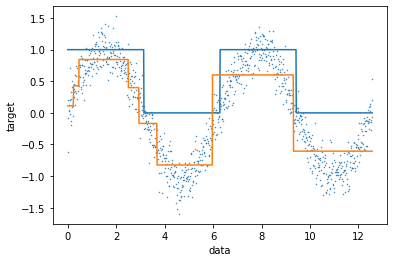

In [299]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(x, y, s=0.2)
ax.set_xlabel("data")
ax.set_ylabel("target")
plt.plot(x, m5.predict(x))

# Working with real data

In [175]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [223]:
x, xt, y, yt = train_test_split(pd.DataFrame(housing.data), pd.DataFrame(housing.target), test_size = 0.2)
x

,0,1,2,3,4,5,6,7
19655,2.4706,22.0,5.232274,1.088020,1441.0,3.523227,37.49,-120.86
4173,2.2788,46.0,4.490054,1.061483,2121.0,3.835443,34.10,-118.23
5739,6.6603,52.0,6.657343,1.038462,797.0,2.786713,34.16,-118.24
1344,3.5129,34.0,5.234072,1.060942,2356.0,3.263158,38.01,-121.90
2745,3.6042,34.0,5.538462,1.000000,621.0,2.985577,32.79,-115.57
...,...,...,...,...,...,...,...,...
15026,2.6678,34.0,5.076220,1.102134,1592.0,2.426829,32.77,-117.01
13214,5.6029,17.0,6.058455,0.993737,1652.0,3.448852,34.03,-117.72
453,4.2788,52.0,4.614458,1.024096,483.0,1.939759,37.88,-122.26
9657,1.9732,32.0,4.989837,1.032520,1344.0,2.731707,36.99,-120.62


In [224]:
y

,0
19655,0.894
4173,1.529
5739,3.804
1344,1.106
2745,0.736
...,...
15026,1.642
13214,1.618
453,3.325
9657,0.694


In [240]:
m2r = tree.DecisionTreeRegressor(max_depth=2, min_samples_leaf=5) 
m2r.fit(x, y)

mean_squared_error(y, m2r.predict(x))

0.7397407418204662

In [241]:
m5r = tree.DecisionTreeRegressor(max_depth=5, min_samples_leaf=5) 
m5r.fit(x, y)

mean_squared_error(y, m5r.predict(x))

0.49766314733842865

In [242]:
m20r = tree.DecisionTreeRegressor(max_depth=20, min_samples_leaf=5) 
m20r.fit(x, y)

mean_squared_error(y, m20r.predict(x))

0.12289753484668854

In [243]:
mr200 = tree.DecisionTreeRegressor(max_depth=150, min_samples_leaf=5) 
mr200.fit(x, y)

mean_squared_error(y, mr200.predict(x))

0.12234481701872059

In [244]:
fi = m20r.tree_.compute_feature_importances(normalize=False)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

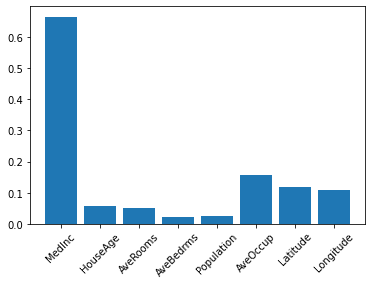

In [245]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.bar(housing.feature_names, fi)
plt.xticks(rotation=45)

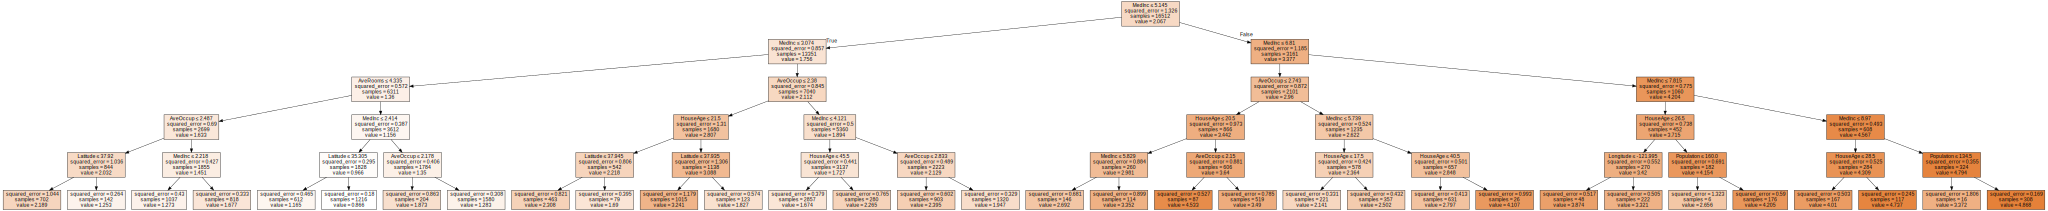

In [247]:
dat = tree.export_graphviz(m5r, filled=True, 
                           special_characters=True,
                           feature_names=housing.feature_names)
graph = graphviz.Source(dat)
graph

# Limitations - Complexity

In [282]:
v = np.linspace(0, 4 * 3.14159, 1000)
xpos = np.sin(v) * v + np.random.randn(1000)
ypos = np.cos(v) * v + np.random.randn(1000)
x1 = [[x, y] for (x, y) in zip(xpos, ypos)]
xpos = -np.sin(v) * v + np.random.randn(1000)
ypos = -np.cos(v) * v + np.random.randn(1000)
x2 = [[x, y] for (x, y) in zip(xpos, ypos)]


x = np.array(x1+x2)
x

y = np.array([True for i in range(1000)] + [False for i in range(1000)])
y = y.reshape(-1, 1)

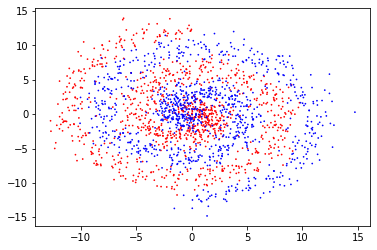

In [283]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=y, cmap='bwr', s=0.5)

In [292]:
ms = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=5) 
ms.fit(x, y)
ŷ = ms.predict(x)

accuracy_score(y, ŷ)

0.5985

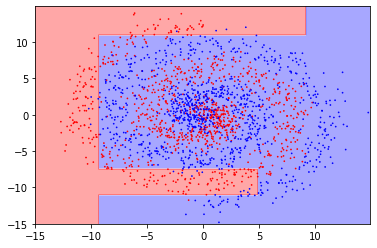

In [293]:
# Plotting decision regions
xx, yy = np.meshgrid(np.arange(-15, 15, 0.1), np.arange(-15, 15, 0.1))
Z = ms.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='bwr')
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=y, cmap='bwr', s=0.5)

In [295]:
ms = tree.DecisionTreeClassifier(max_depth=20, min_samples_leaf=5) 
ms.fit(x, y)
ŷ = ms.predict(x)

accuracy_score(y, ŷ)

0.8965

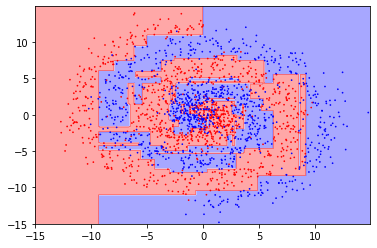

In [296]:
# Plotting decision regions
xx, yy = np.meshgrid(np.arange(-15, 15, 0.1), np.arange(-15, 15, 0.1))
Z = ms.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='bwr')
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=y, cmap='bwr', s=0.5)

# Limitations - Training Samples

In [309]:
x = np.linspace(0, 4 * 3.14159, 1000)
y = np.sin(x) + np.random.randn(1000)/5

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

mts = tree.DecisionTreeRegressor(max_depth=20, min_samples_leaf=5) 
mts.fit(x, y)

mean_squared_error(y, mts.predict(x))

0.028509318717517808

In [310]:
x = np.linspace(0, 8 * 3.14159, 1000)
y = np.sin(x) + np.random.randn(1000)/5

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

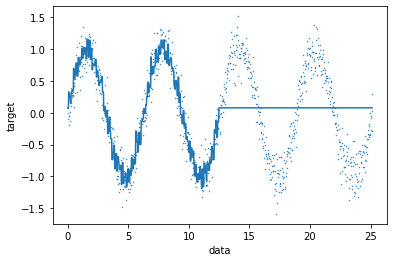

In [311]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(x, y, s=0.2)
ax.set_xlabel("data")
ax.set_ylabel("target")
plt.plot(x, mts.predict(x))